In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_decision_regions

## iris를 이용한 로지스틱 회귀로 분석
* 통계학자 피셔(R.A Fisher)의 붓꽃의 분류 연구에 기반한 데이터
* 꽃받침 길이(Sepal Length), 꽃받침 폭(Sepal Width),
* 꽃잎 길이(Petal Length), 꽃잎 폭(Petal Width)등을 이용해서
* 3가지 붓꽃 종(species)을 구분하는 예제

### 데이터 불러오기

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
X_train, X_test, Y_train,Y_test = train_test_split(iris.data,iris.target, train_size=0.7, stratify=iris.target, random_state=2211171625)

In [7]:
lrclf = LogisticRegression()
lrclf.fit(X_train,Y_train)
pred = lrclf.predict(X_test)

accuracy_score(Y_test,pred)

0.9777777777777777

In [8]:
confusion_matrix(Y_test,pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

In [10]:
# 다항분류인 경우 average=None으로 설정해야 결과가 제대로 나옴
precision_score(Y_test,pred, average=None)

array([1.    , 1.    , 0.9375])

In [11]:
recall_score(Y_test,pred, average=None)

array([1.        , 0.93333333, 1.        ])

### 로지스틱 회귀 좀 더 알아보기
* max_iter : 최적값을 찾는 과정 횟수를 의미
* solver : sklearn 20.x 이상부터는 명시적 지정 필요
   + liblinear : 이항회귀, 작은 데이터셋에 적합
   +  lbfgs, newton-cg : 다항회귀, L1 제약
   + sag, saga : 다항회귀, L2 제약, 확률적 평균 경사하강법 사용
* C : 규제 매개변수, 값이 작아지면 규제강도 증가 (과적합 방지)

In [19]:
X_train, X_test, Y_train,Y_test = train_test_split(iris.data,iris.target, train_size=0.7, stratify=iris.target, random_state=2211171705)

In [23]:
lrclf = LogisticRegression(max_iter=500,solver='lbfgs', multi_class='multinomial',C=0.15)
lrclf.fit(X_train,Y_train)
pred = lrclf.predict(X_test)

accuracy_score(Y_test,pred)

0.9333333333333333

### 분석결과 시각화
+ iris 데이터셋 특성중 임의로 2개만 선택해서 시각화

In [37]:
data = iris.data[:,:2]  # sepal length/width
target = iris.target

X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211171625)

lrclf = LogisticRegression(max_iter=1500,solver='sag', multi_class='multinomial',C=0.15)
lrclf.fit(X_train,Y_train)

print('훈련 정확도 :',lrclf.score(X_train,Y_train))

훈련 정확도 : 0.8


In [38]:
pred = lrclf.predict(X_test)
accuracy_score(Y_test,pred)

0.8444444444444444

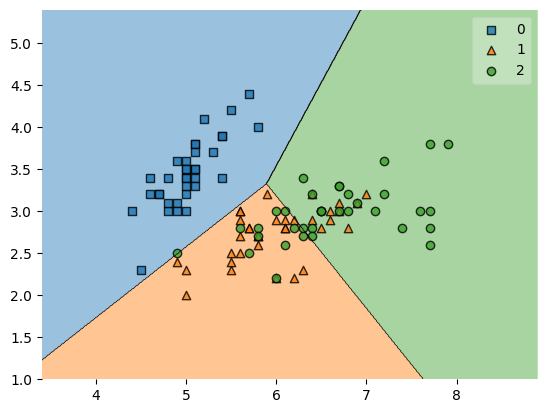

In [39]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, Y_train, clf = lrclf) 
plt.show()

In [95]:
data = iris.data[:,2:]  # sepal length/width
target = iris.target

X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211171625)

lrclf = LogisticRegression(max_iter=1500,solver='sag', multi_class='multinomial',C=0.15)
lrclf.fit(X_train,Y_train)

print('훈련 정확도 :',lrclf.score(X_train,Y_train))

훈련 정확도 : 0.9714285714285714


In [96]:
pred = lrclf.predict(X_test)
accuracy_score(Y_test,pred)

0.9777777777777777

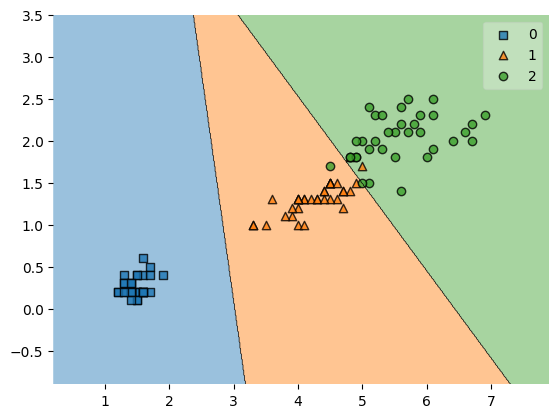

In [97]:
plot_decision_regions(X_train, Y_train, clf = lrclf) 
plt.show()

### 와인 데이터 분류하기
+ 와인의 화학 조성을 사용하여 와인의 종류를 예측
  + 알콜(Alcohol), 말산(Malic acid),회분(Ash)
  + 회분의 알칼리도(Alcalinity of ash),마그네슘(Magnesium)
  + 총 폴리페놀(Total phenols),플라보노이드 폴리페놀(Flavanoids)
  + 비 플라보노이드 폴리페놀(Nonflavanoid phenols),
  + 프로안토시아닌(Proanthocyanins),색상의 강도(Color intensity)
  + 색상(Hue),희석 와인의 OD280/OD315 비율,프롤린(Proline)
+ 와인의 종류 0, 1, 2의 세가지 값

In [6]:
from sklearn.datasets import load_wine

wine = load_wine()

In [7]:
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [18]:
wine.feature_names[0]

'alcohol'

훈련 정확도 : 0.7741935483870968


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


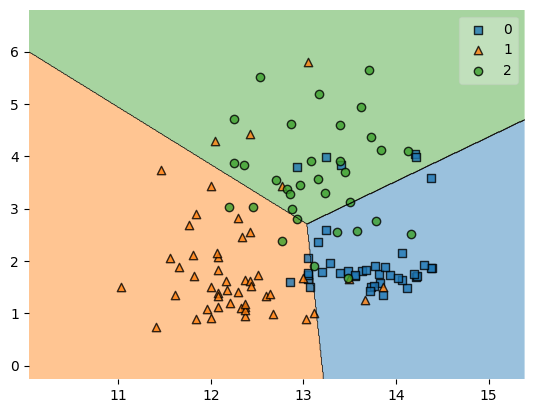

훈련 정확도 : 0.6129032258064516


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


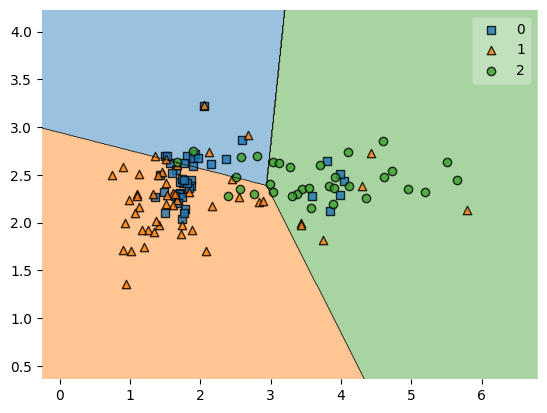

훈련 정확도 : 0.5967741935483871


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


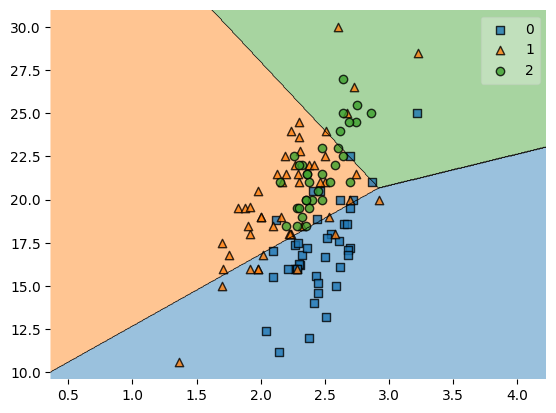

훈련 정확도 : 0.5887096774193549


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


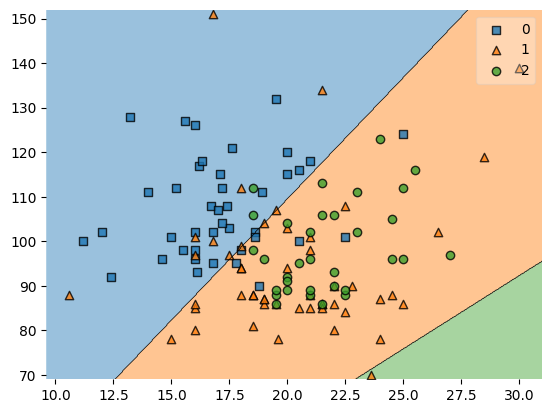

훈련 정확도 : 0.6935483870967742


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


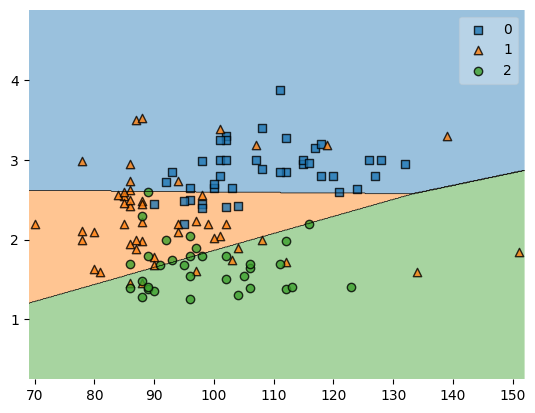

훈련 정확도 : 0.75


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


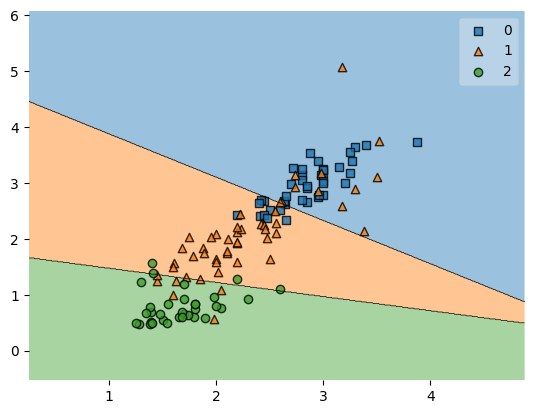

훈련 정확도 : 0.7983870967741935


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


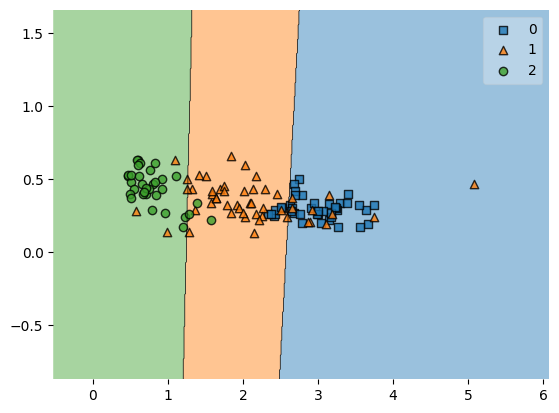

훈련 정확도 : 0.5161290322580645


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


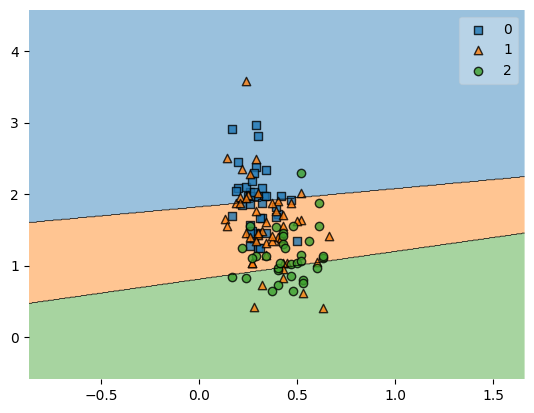

훈련 정확도 : 0.8306451612903226


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


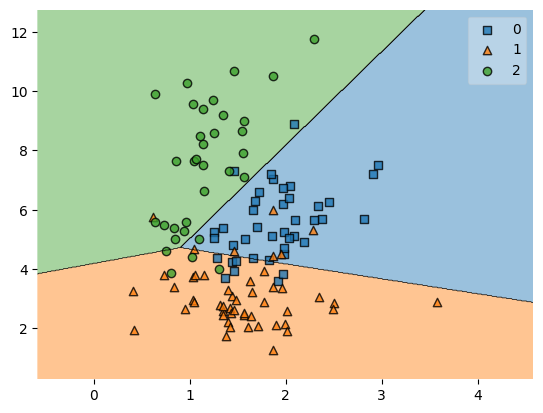

훈련 정확도 : 0.7741935483870968


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


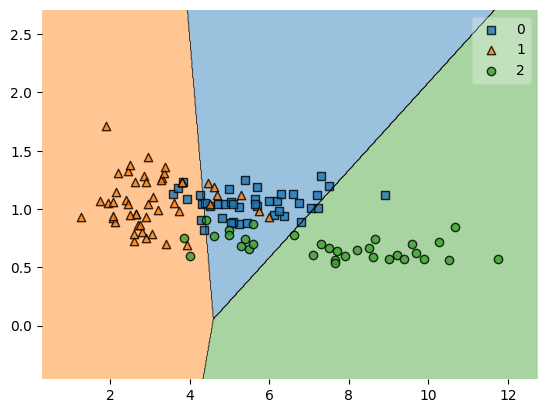

훈련 정확도 : 0.6774193548387096


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\574853402.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)


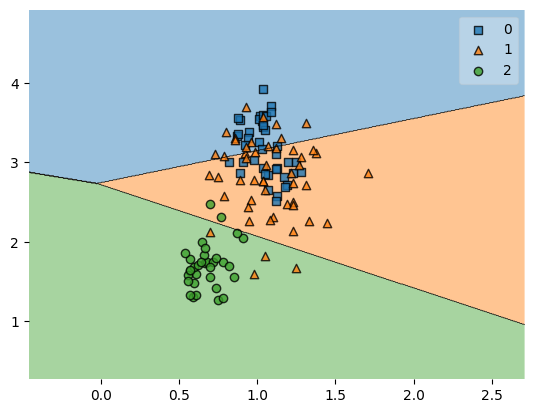

In [25]:
result = pd.DataFrame(columns=['훈련정확도','정확도','예측데이터'])
 
for i in range(11):
    data = wine.data[:,i:i+2]
    target = wine.target
    
    X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211171625)

    lrclf = LogisticRegression(max_iter=5000,solver='sag', multi_class='multinomial',C=0.15)
    lrclf.fit(X_train,Y_train)

    print('훈련 정확도 :',lrclf.score(X_train,Y_train))

    pred = lrclf.predict(X_test)
    
    result = result.append({'훈련정확도':lrclf.score(X_train,Y_train),'정확도':accuracy_score(Y_test,pred),'예측데이터':f'{wine.feature_names[i]}-{wine.feature_names[i+1]}'}, ignore_index=True)

    plot_decision_regions(X_train, Y_train, clf = lrclf) 
    plt.show()

In [26]:
result

,훈련정확도,정확도,예측데이터
0,0.774194,0.777778,alcohol-malic_acid
1,0.612903,0.481481,malic_acid-ash
2,0.596774,0.611111,ash-alcalinity_of_ash
3,0.588710,0.629630,alcalinity_of_ash-magnesium
4,0.693548,0.629630,magnesium-total_phenols
5,0.750000,0.814815,total_phenols-flavanoids
6,0.798387,0.833333,flavanoids-nonflavanoid_phenols
7,0.516129,0.518519,nonflavanoid_phenols-proanthocyanins
8,0.830645,0.814815,proanthocyanins-color_intensity
9,0.774194,0.703704,color_intensity-hue
